<a href="https://colab.research.google.com/github/kausernisa/NK/blob/main/GOLD_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT THE DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA COLLECTION AND PREPROCESSING

In [ ]:
# Load the data from csv file to Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic info abour the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values in each column
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

DATA ANALYSIS

In [ ]:
# getting some statistical measures about the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
correlation = gold_data.corr()

<ipython-input-96-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

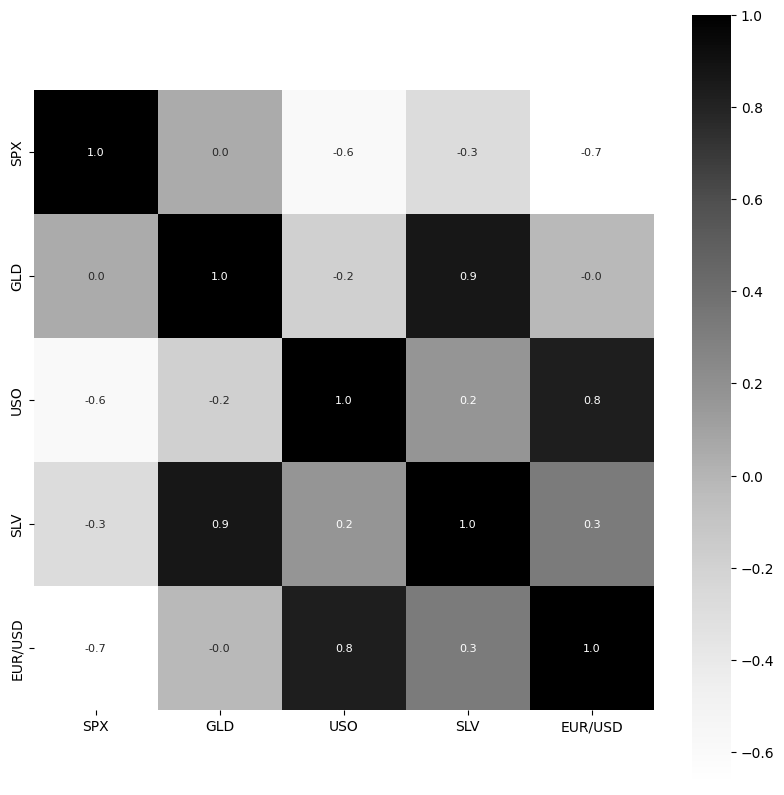

In [ ]:
# contructing a heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Greys')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-99-26e723770c6c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'blue')


<Axes: xlabel='GLD', ylabel='Density'>

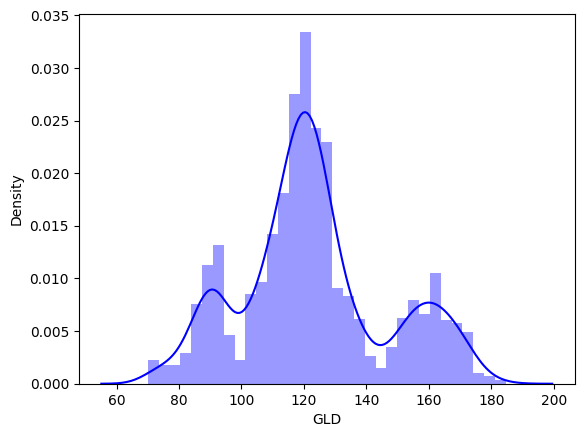

In [ ]:
# checking the distribution of GLD prices
sns.distplot(gold_data['GLD'], color = 'blue')

SPLITTING THE FEATURES AND TARGET

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [ ]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

SPLITTING INTO TRAINING DATA AND TESTING DATA

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

MODEL TRAINING

RANDOM FOREST REGRESSOR

In [ ]:
model = RandomForestRegressor()

In [ ]:
# training the Random Forest Regressor model with training data
model.fit(X_train, Y_train)

RandomForestRegressor()

MODEL EVALUATION

In [ ]:
# prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
training_data_prediction

array([109.98019784, 114.77180085,  90.71350011, ..., 130.6994964 ,
       159.88689631, 114.7168999 ])

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.9984101046613106


VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES

In [ ]:
Y_train = list(Y_train)

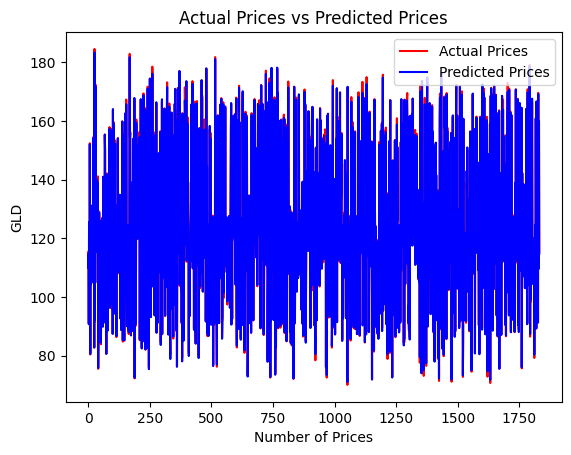

In [ ]:
plt.plot(Y_train,label = 'Actual Prices', color ='Red' )
plt.plot(training_data_prediction, label = 'Predicted Prices', color = 'Blue')
plt.xlabel("Number of Prices")
plt.ylabel("GLD")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

MODEL EVALUATION

In [ ]:
# prediction on testing data
testing_data_prediction = model.predict(X_test)

In [ ]:
testing_data_prediction

array([168.521299  ,  82.07060004, 116.06550003, 127.80290096,
       120.70030114, 154.76389693, 150.76579795, 126.08320023,
       117.43649868, 125.90630088, 116.93800085, 171.73080078,
       141.95689915, 168.10479926, 115.11640042, 117.81370063,
       139.16270326, 170.31160088, 158.86060295, 159.50259999,
       154.86860041, 125.25119959, 175.85779963, 157.65140305,
       125.13240055,  93.76349977,  77.90180021, 120.61459988,
       119.06219925, 167.45309951,  88.28130012, 125.17439992,
        91.09570078, 117.66650043, 121.09429933, 136.28590016,
       115.2760012 , 115.03400085, 145.95730041, 107.3692008 ,
       104.48320229,  87.33199802, 126.56550023, 118.04469968,
       153.23639909, 119.5385002 , 108.60059967, 108.27479842,
        93.10780006, 127.17609765,  75.51279999, 113.66749926,
       121.30900011, 111.33339914, 118.90869882, 120.67899943,
       159.47450024, 167.05660138, 147.07599667,  85.9968987 ,
        94.31010042,  86.73209869,  90.58230004, 118.91

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.9901040893870617


VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES

In [ ]:
Y_test = list(Y_test)

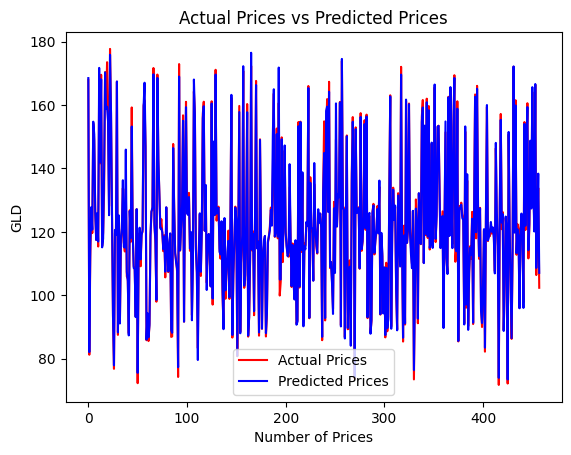

In [ ]:
plt.plot(Y_test,label = 'Actual Prices', color ='Red' )
plt.plot(testing_data_prediction, label = 'Predicted Prices', color = 'Blue')
plt.xlabel("Number of Prices")
plt.ylabel("GLD")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()